## Umap-learn python library

In [ ]:
import sys
!{sys.executable} -m pip install umap-learn
!{sys.executable} -m pip install pandas matplotlib datashader bokeh holoviews scikit-image colorcet

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml

# figure size in inches
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import umap

sns.set_theme()
plt.rcParams['figure.figsize'] = [10, 8]

## UMAP embedding of iris data

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


<Axes: xlabel='UMAP1', ylabel='UMAP2'>

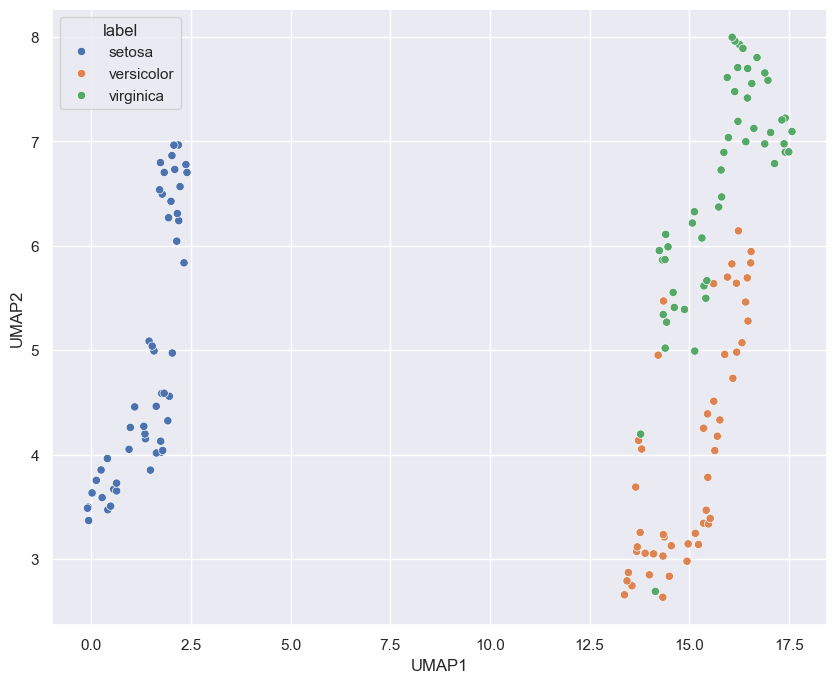

In [3]:
# Load the data
iris = load_iris()

iris_data = iris['data']
iris_label = iris['target_names'][iris['target']]

# Scale iris data
scaled_iris_data = StandardScaler().fit_transform(iris_data)

# Transform the data
umap_obj = umap.UMAP(n_neighbors=20)
umap_obj = umap_obj.fit(scaled_iris_data)
embedding = umap_obj.transform(scaled_iris_data)

# Plot embeded data
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['label'] = iris_label

sns.scatterplot(embedding_df, x='UMAP1', y='UMAP2', hue='label')

In [4]:
umap_obj.embedding_

array([[ 1.35644436e+00,  4.15192652e+00],
       [ 2.18169403e+00,  6.96558046e+00],
       [ 2.14153552e+00,  6.04460764e+00],
       [ 1.99687052e+00,  6.42637253e+00],
       [ 9.44496512e-01,  4.05104256e+00],
       [ 1.23395212e-01,  3.75384498e+00],
       [ 1.44730473e+00,  5.08698654e+00],
       [ 1.76430428e+00,  4.58593512e+00],
       [ 1.82730293e+00,  6.70305872e+00],
       [ 2.37087870e+00,  6.77881765e+00],
       [ 4.00976092e-01,  3.96303558e+00],
       [ 1.56968129e+00,  4.99339247e+00],
       [ 2.02070284e+00,  6.86418819e+00],
       [ 1.77624989e+00,  6.49515247e+00],
       [ 1.69450752e-02,  3.63322878e+00],
       [-6.91229329e-02,  3.36905766e+00],
       [ 2.69664884e-01,  3.58863068e+00],
       [ 1.34354305e+00,  4.19833231e+00],
       [ 2.42650688e-01,  3.85322785e+00],
       [ 5.60711563e-01,  3.66924262e+00],
       [ 1.75258589e+00,  4.02414179e+00],
       [ 6.32305145e-01,  3.65262604e+00],
       [ 1.08595717e+00,  4.45746422e+00],
       [ 1.

In [5]:
umap_obj.graph_

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 3594 stored elements and shape (150, 150)>

## UMAP embedding of digits data

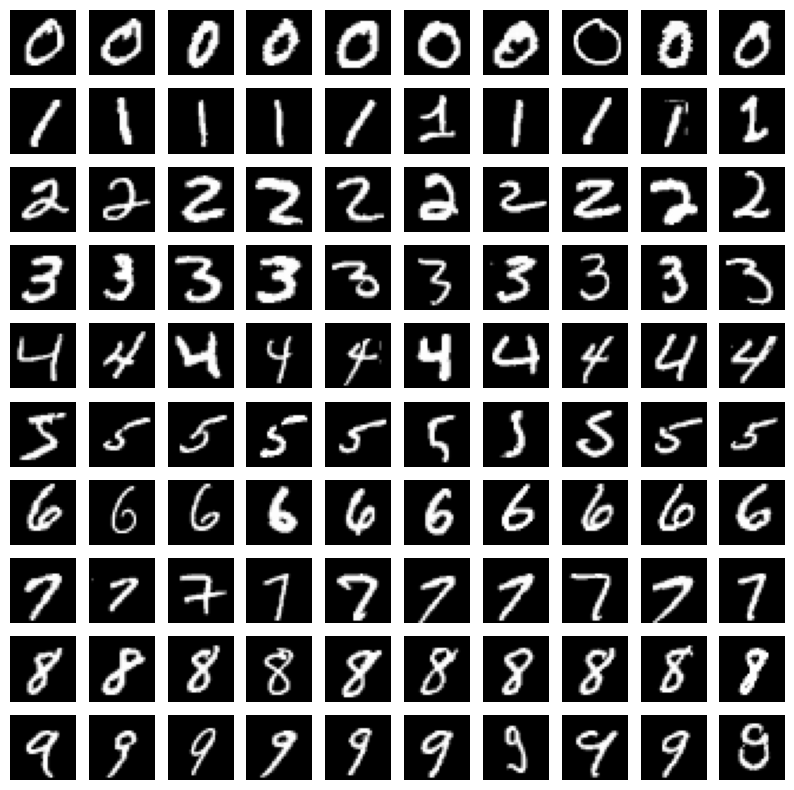

In [6]:
# Load the digits data
mnist = fetch_openml('mnist_784', parser='auto')

# Normalize digits data
mnist_data = mnist.data/255
mnist_label = mnist.target

n_row = 10
n_col = 10
fig, axes = plt.subplots(n_row, n_col, figsize=(10, 10))

mnist_data_np = mnist_data.to_numpy()
mnist_labels_np = mnist_label.to_numpy()

# Loop through subplots to populate them with MNIST digits
for i in range(n_row):
    # Get indices of digits that match the current row number (i.e., '0' for the first row, '1' for the second, etc.)
    indices = np.where(mnist_labels_np == str(i))[0][:n_col]  # Take first 'n_col' indices

    for j in range(n_col):
        
        ax = axes[i, j]  # Get the subplot

        # Reshape the 784-number array back to a 28x28 image and plot it
        ax.imshow(mnist_data_np[indices[j]].reshape(28, 28), cmap='gray')

        # Hide axis labels and ticks
        ax.axis('off')

# Show the grid of MNIST digits
plt.show()

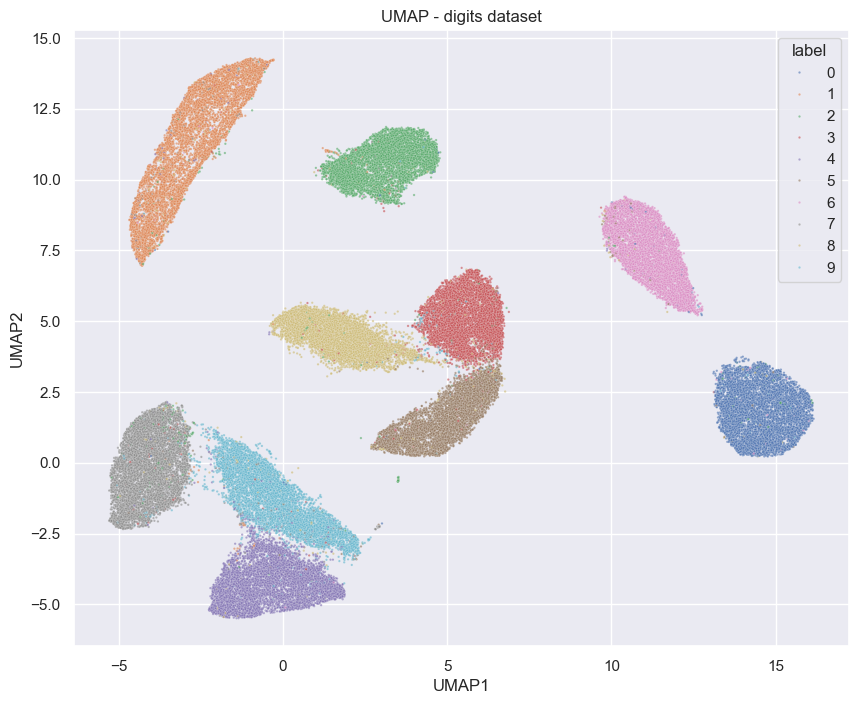

In [7]:
# Perfrom UMAP dimensionality reduction
umap_obj = umap.UMAP()
embedding = umap_obj.fit_transform(mnist_data)

# Plot embeddings
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['label'] = mnist_label

sns.scatterplot(embedding_df, x='UMAP1', y='UMAP2', hue='label', alpha=0.6, s=3)
plt.title('UMAP - digits dataset')
plt.show()

### UMAP plotting capabilities

In [10]:
import umap.plot as uplot

/opt/anaconda3/envs/ml_env/lib/python3.11/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/opt/anaconda3/envs/ml_env/lib/python3.11/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/opt/anaconda3/envs/ml_env/lib/python3.11/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, e

<Axes: >

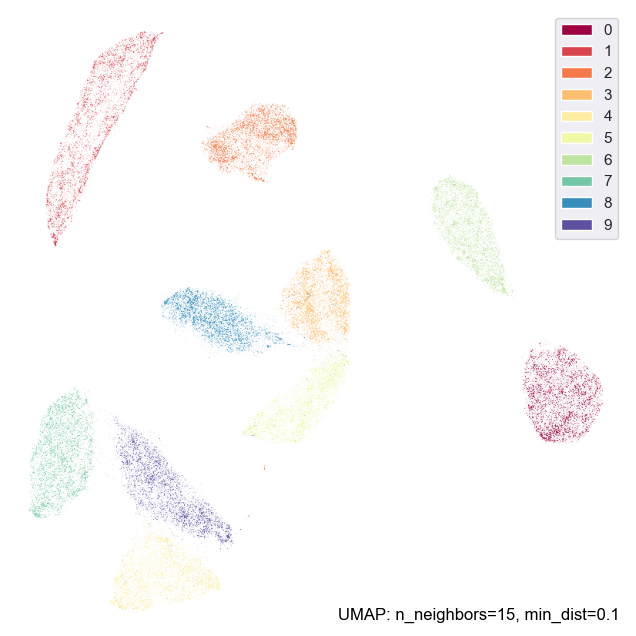

In [11]:
# Plot with visible densities and labels
uplot.points(umap_obj, labels=mnist_label)

<Axes: >

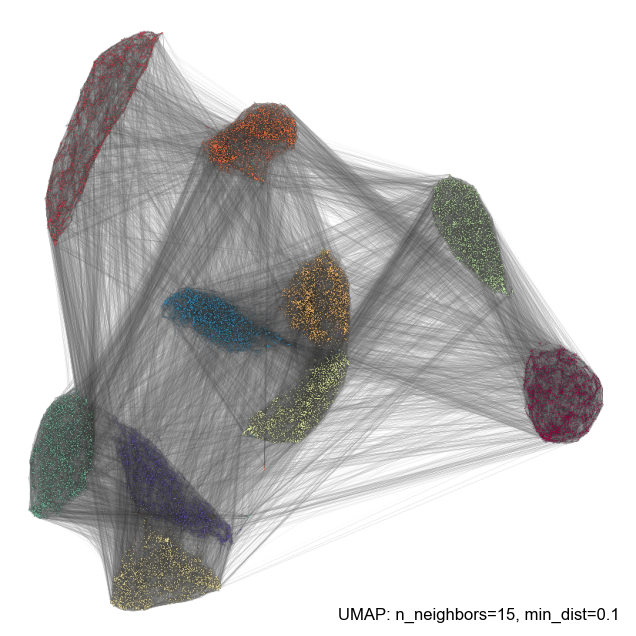

In [12]:
uplot.connectivity(umap_obj, show_points=True, labels=mnist_label)